#**Import Required Pakages and Data**

In [38]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf


#**Checking avaiable devices**

In [39]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3863066713748220424
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8551855977837978222
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


#**Data Splitting**



In [40]:
# Loading DataSet
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#**Dataset Display**

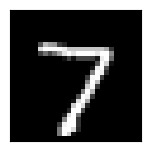

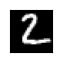

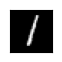

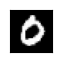

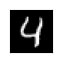

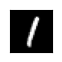

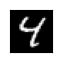

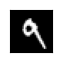

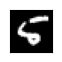

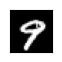

In [41]:
import matplotlib.pyplot as plt

# number of digits to display
n = 10

# create a figure to display the images
plt.figure(figsize=(20, 4))

# loop through the first n images
for i in range(n):
  # Create a subplot within the figure
  ax = plt.subplot(2,n,i+1)

  #Display the orignal image
  plt.imshow(X_test[i].reshape(28,28))

  #color
  plt.gray()
  # Hide x axis and y axis labels and ticks
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


  plt.show()
  plt.close()

#Displaying the shapes of dataset

In [42]:
print("x_train shape :", X_train.shape)
print("y_train shape :", Y_train.shape)
print("x_test shape :", X_test.shape)
print("y_test shape :", Y_test.shape)

x_train shape : (60000, 28, 28)
y_train shape : (60000,)
x_test shape : (10000, 28, 28)
y_test shape : (10000,)


#**Reshaping the Data**

In [43]:
# Reshaping data in "channel last" format for consumption of tensorflow backend
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

#**Min Max Scalling**

In [44]:
# converting to floating point and normalizing pixel values in range [0,1]
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

#**One Hot Encoding**

In [45]:
# Reshaping labels in one-hot encoding for multi-class classification
from keras.utils import to_categorical

Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

# Seeing updated shapes
print("X_train shape :", X_train.shape)
print("Y_train shape :", Y_train.shape)
print("X_test shape :", X_test.shape)
print("Y_test shape :", Y_test.shape)

X_train shape : (60000, 28, 28, 1)
Y_train shape : (60000, 10)
X_test shape : (10000, 28, 28, 1)
Y_test shape : (10000, 10)


#**Building the CNN**

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D


In [47]:
img_rows, img_cols, channels = 28, 28, 1
filters = [6, 32, 80, 120]
classes = 10

In [48]:
# creating model
model = Sequential()
model.add(Conv2D(filters[0],(3,3), padding='same',\
                 activation='relu', input_shape=(img_rows, img_cols, channels)))
model.add(MaxPooling2D(pool_size=(2,2))) # for reducing image size

model.add(Conv2D(filters[1],(2,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters[2],(2,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters[3],(2,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         60        
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        800       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 80)          10320     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 3, 3, 80)         

#**Training the CNN**

In [50]:
model.fit(X_train, Y_train, validation_split=0.2, epochs=15, batch_size=64, verbose=1)

Epoch 1/15
750/750 [==============================] - 8s 6ms/step - loss: 1.9492 - accuracy: 0.3717 - val_loss: 0.8673 - val_accuracy: 0.7253
Epoch 2/15
750/750 [==============================] - 3s 4ms/step - loss: 0.5487 - accuracy: 0.8217 - val_loss: 0.2669 - val_accuracy: 0.9193
Epoch 3/15
750/750 [==============================] - 4s 5ms/step - loss: 0.2573 - accuracy: 0.9195 - val_loss: 0.1691 - val_accuracy: 0.9484
Epoch 4/15
750/750 [==============================] - 4s 5ms/step - loss: 0.1731 - accuracy: 0.9450 - val_loss: 0.1335 - val_accuracy: 0.9591
Epoch 5/15
750/750 [==============================] - 4s 5ms/step - loss: 0.1349 - accuracy: 0.9573 - val_loss: 0.1167 - val_accuracy: 0.9634
Epoch 6/15
750/750 [==============================] - 3s 4ms/step - loss: 0.1101 - accuracy: 0.9652 - val_loss: 0.1001 - val_accuracy: 0.9712
Epoch 7/15
750/750 [==============================] - 3s 4ms/step - loss: 0.0953 - accuracy: 0.9695 - val_loss: 0.1014 - val_accuracy: 0.9679
Epoch 